In [150]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
# plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 데이터 전처리 알고리즘
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 학습용과 검증용으로 나누는 함수
from sklearn.model_selection import train_test_split

# 교차 검증
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 평가함수
# 분류용
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

# 회귀용
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# 모델의 최적의 하이퍼 파라미터를 찾기 위한 도구
from sklearn.model_selection import GridSearchCV

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

# 학습 모델 저장을 위한 라이브러리
import pickle

import matplotlib as mpl
import matplotlib.font_manager as fm

In [152]:
df1 = pd.read_parquet('train_all_high_corr.parquet')
df2 = pd.read_parquet('train_segment.parquet')

In [153]:
df3 = pd.concat([df1, df2['Segment']], axis=1)

In [156]:
df3

,기준년월,ID,이용금액_R3M_신용체크,입회경과개월수_신용,소지카드수_유효_신용,_2순위카드이용금액,최초한도금액,CA한도금액,CA이자율_할인전,시장연체상환여부_R3M,...,IB문의건수_선결제_R6M,불만제기후경과월_R12M,홈페이지_금융건수_R6M,홈페이지_선결제건수_R6M,인입횟수_ARS_R6M,컨택건수_이용유도_TM_R6M,컨택건수_이용유도_EM_R6M,잔액_한도소진율,변동률_RV평잔,Segment
0,201807,TRAIN_000000,196,67,1,0,0,7270,22.995207,0,...,0,12,0,0,1,3,57,4.013659,0.321733,D
1,201807,TRAIN_000001,13475,12,1,0,0,5718,14.793821,0,...,0,12,0,0,0,2,2,7.318237,0.606623,E
2,201807,TRAIN_000002,23988,124,1,0,0,35207,22.014276,0,...,0,12,11,6,0,2,12,4.426060,0.340561,C
3,201807,TRAIN_000003,3904,27,2,0,0,6531,22.998014,0,...,0,12,0,0,1,2,35,6.573680,0.321733,D
4,201807,TRAIN_000004,1190,2,1,0,0,47149,14.661948,0,...,0,0,0,0,0,7,0,-2.044904,0.321733,E
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2399995,201812,TRAIN_399995,10755,209,1,0,0,10167,15.243670,0,...,0,0,0,0,0,0,0,-1.890821,0.321733,E
2399996,201812,TRAIN_399996,27636,17,1,0,0,31159,14.843464,0,...,0,12,0,0,0,0,58,-0.785374,0.321733,D
2399997,201812,TRAIN_399997,23187,115,1,0,0,19429,17.038599,0,...,0,12,0,0,0,0,0,-0.233282,0.321733,C
2399998,201812,TRAIN_399998,0,71,1,0,0,4228,15.182880,0,...,0,0,0,0,0,0,0,-1.998546,0.321733,E


In [158]:
df3.drop(columns=['ID', '기준년월'], inplace=True)

In [160]:
# 0. X, y 분리
#─────────────────────────────────────────────
X = df3.drop(columns=['Segment'])
y = df3['Segment']

#─────────────────────────────────────────────
# 1. 학습/검증 세트로 먼저 나누기 (Stratified)
#─────────────────────────────────────────────
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

print('Train class distribution:\n', y_train.value_counts(normalize=True))
print('Val   class distribution:\n', y_val.value_counts(normalize=True))

Train class distribution:
 Segment
E    0.800855
D    0.145518
C    0.053163
A    0.000405
B    0.000060
Name: proportion, dtype: float64
Val   class distribution:
 Segment
E    0.800856
D    0.145517
C    0.053163
A    0.000404
B    0.000060
Name: proportion, dtype: float64


In [162]:
# ─────────────────────────────────────────────
# 1. 그룹 정의
# ─────────────────────────────────────────────
group_AB = ['A', 'B']
group_CD = ['C', 'D']
group_E  = ['E']

# ─────────────────────────────────────────────
# 2. 마스크 정의 (Train)
# ─────────────────────────────────────────────
mask_AB_train = y_train.isin(group_AB)
mask_CD_train = y_train.isin(group_CD)
mask_E_train  = y_train.isin(group_E)

# ─────────────────────────────────────────────
# 3. 마스크 정의 (Validation)
# ─────────────────────────────────────────────
mask_AB_val = y_val.isin(group_AB)
mask_CD_val = y_val.isin(group_CD)
mask_E_val  = y_val.isin(group_E)

# ─────────────────────────────────────────────
# 4. 각 그룹별 데이터 분리
# ─────────────────────────────────────────────

# ── A/B 그룹
X_train_AB, y_train_AB = X_train[mask_AB_train], y_train[mask_AB_train]
X_val_AB,   y_val_AB   = X_val[mask_AB_val],     y_val[mask_AB_val]

# ── C/D 그룹
X_train_CD, y_train_CD = X_train[mask_CD_train], y_train[mask_CD_train]
X_val_CD,   y_val_CD   = X_val[mask_CD_val],     y_val[mask_CD_val]

# ── E 그룹
X_train_E, y_train_E = X_train[mask_E_train], y_train[mask_E_train]
X_val_E,   y_val_E   = X_val[mask_E_val],     y_val[mask_E_val]

In [164]:
# E → 1, A/B/C/D → 0
y_train_binary = y_train.apply(lambda x: 1 if x == 'E' else 0)
y_val_binary   = y_val.apply(lambda x: 1 if x == 'E' else 0)

In [166]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 모델 정의
model_E_vs_nonE = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=False
)

# 학습
model_E_vs_nonE.fit(X_train, y_train_binary)

# 예측
y_pred = model_E_vs_nonE.predict(X_val)

# 평가
print("📊 Classification Report:")
print(classification_report(y_val_binary, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_val_binary, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.73      0.77     95589
           1       0.93      0.96      0.95    384411

    accuracy                           0.91    480000
   macro avg       0.88      0.85      0.86    480000
weighted avg       0.91      0.91      0.91    480000

🧾 Confusion Matrix:
[[ 69828  25761]
 [ 15429 368982]]


### class-weight 조절 후 학습, 예측 평가 결과

In [168]:
# 클래스별 개수
from collections import Counter

counts = Counter(y_train_binary)
print(counts)
# 예시: Counter({1: 384411, 0: 95589})

# 반비례 가중치 계산
total = sum(counts.values())
class_weights = [total / (2 * counts[0]), total / (2 * counts[1])]
print("Class weights:", class_weights)
# 출력 예시: [2.5, 0.6] → Non-E 가중치 ↑

Counter({1: 1537641, 0: 382359})
Class weights: [2.5107294453641735, 0.6243329879991494]


In [170]:
from catboost import CatBoostClassifier

model_E_vs_nonE = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    class_weights=class_weights,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=False
)

model_E_vs_nonE.fit(X_train, y_train_binary)

In [172]:
# 예측
y_pred = model_E_vs_nonE.predict(X_val)

# 평가
print("📊 Classification Report:")
print(classification_report(y_val_binary, y_pred))

print("🧾 Confusion Matrix:")
print(confusion_matrix(y_val_binary, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.89      0.75     95589
           1       0.97      0.88      0.92    384411

    accuracy                           0.88    480000
   macro avg       0.81      0.89      0.84    480000
weighted avg       0.91      0.88      0.89    480000

🧾 Confusion Matrix:
[[ 85255  10334]
 [ 45613 338798]]


### SHAP로 feature importance 확인

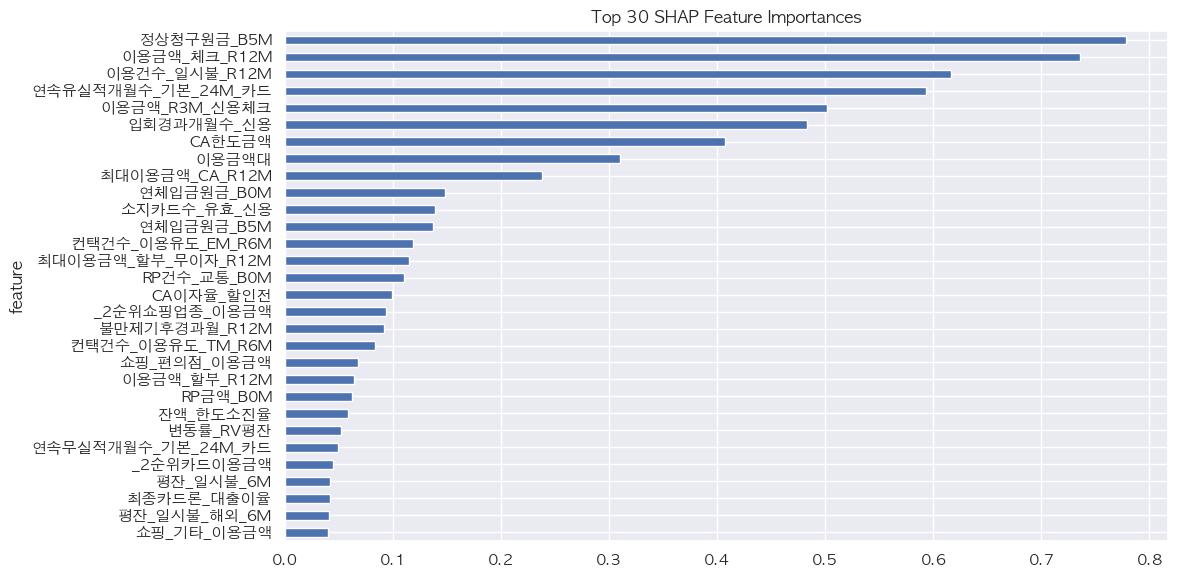

In [176]:
from catboost import Pool
import pandas as pd
import numpy as np

# CatBoost Pool 생성
pool = Pool(X_train, y_train_binary)

# SHAP 값 직접 추출 (전체 SHAP 행렬 반환)
shap_values = model_E_vs_nonE.get_feature_importance(
    type='ShapValues',
    data=pool,
    prettified=False
)

# SHAP 배열은 (n_samples, n_features + 1)
# 마지막 열은 bias term → 제외
shap_values = np.array(shap_values)[:, :-1]

# 평균 절댓값으로 중요도 계산
mean_abs_shap = np.abs(shap_values).mean(axis=0)

# 피처 이름 연결
feature_importances_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': mean_abs_shap
}).sort_values(by='importance', ascending=False)

# 상위 N개 시각화
top_n = 30
feature_importances_df.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    title=f"Top {top_n} SHAP Feature Importances",
    legend=False
)
import matplotlib.pyplot as plt
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### feature importance 상위 20개로 재학습

In [178]:
# 상위 20개 피처 선택
top_features = feature_importances_df.head(20)['feature'].tolist()

# 훈련/검증 셋에서 해당 피처만 선택
X_train_selected = X_train[top_features]
X_val_selected   = X_val[top_features]

from catboost import CatBoostClassifier

# class_weights는 이전에 계산한 걸 그대로 사용한다고 가정
model_shap_20 = CatBoostClassifier(
    iterations=300,
    learning_rate=0.1,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=False
)

model_shap_20.fit(X_train_selected, y_train_binary)

from sklearn.metrics import classification_report, confusion_matrix

# 확률 예측 → threshold = 0.5
y_proba_20 = model_shap_1.predict_proba(X_val_selected)[:, 1]
y_pred_20 = (y_proba_20 > 0.5).astype(int)

# 평가 출력
print("📊 SHAP Top 20 피처 모델 성능:")
print(classification_report(y_val_binary, y_pred_20))
print(confusion_matrix(y_val_binary, y_pred_20))

📊 SHAP Top 20 피처 모델 성능:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33     95589
           1       0.00      0.00      0.00    384411

    accuracy                           0.20    480000
   macro avg       0.10      0.50      0.17    480000
weighted avg       0.04      0.20      0.07    480000

[[ 95589      0]
 [384411      0]]


### Optuna 설치, 실행

In [118]:
pip install optuna

Note: you may need to restart the kernel to use updated packages.


In [120]:
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import f1_score

def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 300, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'depth': trial.suggest_int('depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'random_strength': trial.suggest_float('random_strength', 0.0, 1.0),
        'class_weights': [2.5, 0.6],  # E vs Non-E 비율 적용
        'loss_function': 'Logloss',
        'eval_metric': 'F1',
        'verbose': 0,
        'random_seed': 42
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train_binary, eval_set=(X_val, y_val_binary), early_stopping_rounds=50)
    y_pred = model.predict(X_val)
    return f1_score(y_val_binary, y_pred)

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

print("🎯 Best Params:", study.best_params)
print("📈 Best F1 Score:", study.best_value)

[I 2025-07-14 01:19:14,964] A new study created in memory with name: no-name-75bd250b-c375-4ea2-bb4d-8d8a5799c710
[I 2025-07-14 01:21:17,464] Trial 0 finished with value: 0.9284905126026621 and parameters: {'iterations': 640, 'learning_rate': 0.08495947230731417, 'depth': 8, 'l2_leaf_reg': 6.27016660382634, 'bagging_temperature': 0.6149452716849915, 'random_strength': 0.6739721770056244}. Best is trial 0 with value: 0.9284905126026621.
[I 2025-07-14 01:30:38,346] Trial 1 finished with value: 0.9485312746736874 and parameters: {'iterations': 701, 'learning_rate': 0.18859228605871625, 'depth': 10, 'l2_leaf_reg': 3.480471370909337, 'bagging_temperature': 0.3992592834216012, 'random_strength': 0.3174318414771645}. Best is trial 1 with value: 0.9485312746736874.
[I 2025-07-14 02:05:30,308] Trial 2 finished with value: 0.9361681965921536 and parameters: {'iterations': 503, 'learning_rate': 0.11122171401841863, 'depth': 10, 'l2_leaf_reg': 2.408275025558044, 'bagging_temperature': 0.9385641173

🎯 Best Params: {'iterations': 701, 'learning_rate': 0.18859228605871625, 'depth': 10, 'l2_leaf_reg': 3.480471370909337, 'bagging_temperature': 0.3992592834216012, 'random_strength': 0.3174318414771645}
📈 Best F1 Score: 0.9485312746736874


### Optuna 적용한 feature importance 상위 20개로 재학습

In [136]:
# 상위 20개 피처 선택
top_features = feature_importances_df.head(20)['feature'].tolist()

# 훈련/검증 셋에서 해당 피처만 선택
X_train_selected = X_train[top_features]
X_val_selected   = X_val[top_features]

from catboost import CatBoostClassifier

# class_weights는 이전에 계산한 걸 그대로 사용한다고 가정



model = CatBoostClassifier(
    iterations=701,
    learning_rate=0.188,
    depth=10,
    l2_leaf_reg=3.48,
    bagging_temperature=0.399,
    random_strength=0.317,
    loss_function='Logloss',
    class_weights=class_weights,
    random_seed=42,
    verbose=100
)


model_shap_20.fit(X_train_selected, y_train_binary)

from sklearn.metrics import classification_report, confusion_matrix

# 확률 예측 → threshold = 0.5
y_proba_20 = model_shap_20.predict_proba(X_val_selected)[:, 1]
y_pred_20 = (y_proba_20 > 0.5).astype(int)

# 평가 출력
print("📊 SHAP Top 20 피처 모델 성능:")
print(classification_report(y_val_binary, y_pred_20))
print(confusion_matrix(y_val_binary, y_pred_20))

📊 SHAP Top 20 피처 모델 성능:
              precision    recall  f1-score   support

           0       0.64      0.89      0.75     95589
           1       0.97      0.88      0.92    384411

    accuracy                           0.88    480000
   macro avg       0.81      0.88      0.83    480000
weighted avg       0.90      0.88      0.89    480000

[[ 85028  10561]
 [ 46849 337562]]


### AB vs CD

In [88]:
# AB vs CD용 데이터만 추출
mask_nonE = y_train.isin(['A', 'B', 'C', 'D'])
X_train_abcd = X_train[mask_nonE]
y_train_abcd = y_train[mask_nonE]

mask_nonE_val = y_val.isin(['A', 'B', 'C', 'D'])
X_val_abcd = X_val[mask_nonE_val]
y_val_abcd = y_val[mask_nonE_val]

# 라벨 매핑: AB → 0, CD → 1
def map_abcd(label):
    return 0 if label in ['A', 'B'] else 1

y_train_abcd_bin = y_train_abcd.map(map_abcd)
y_val_abcd_bin   = y_val_abcd.map(map_abcd)

In [90]:
from catboost import CatBoostClassifier

model_ab_vs_cd = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    random_seed=42,
    verbose=False
)

model_ab_vs_cd.fit(X_train_abcd, y_train_abcd_bin)

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred_abcd = model_ab_vs_cd.predict(X_val_abcd)
print(classification_report(y_val_abcd_bin, y_pred_abcd))
print(confusion_matrix(y_val_abcd_bin, y_pred_abcd))

              precision    recall  f1-score   support

           0       0.90      0.24      0.38       223
           1       1.00      1.00      1.00     95366

    accuracy                           1.00     95589
   macro avg       0.95      0.62      0.69     95589
weighted avg       1.00      1.00      1.00     95589

[[   54   169]
 [    6 95360]]


- AB를 거의 못맞춤.
- 클래스 불균형 해소 후 재학습, 예측, 평가

### AB vs CD (Class-weight 조절)

In [96]:
from catboost import CatBoostClassifier

# 클래스별 가중치 (반비례 방식)
total = len(y_train_abcd_bin)
class_counts = y_train_abcd_bin.value_counts()

class_weights = {
    0: total / (2 * class_counts[0]),  # AB
    1: total / (2 * class_counts[1])   # CD
}

model_ab_vs_cd = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,
    random_seed=42,
    verbose=False
)

model_ab_vs_cd.fit(X_train_abcd, y_train_abcd_bin)

y_pred_abcd = model_ab_vs_cd.predict(X_val_abcd)
print(classification_report(y_val_abcd_bin, y_pred_abcd))
print(confusion_matrix(y_val_abcd_bin, y_pred_abcd))

              precision    recall  f1-score   support

           0       0.27      0.98      0.42       223
           1       1.00      0.99      1.00     95366

    accuracy                           0.99     95589
   macro avg       0.63      0.99      0.71     95589
weighted avg       1.00      0.99      1.00     95589

[[  218     5]
 [  600 94766]]


### AB vs CD : SHAP 분석 

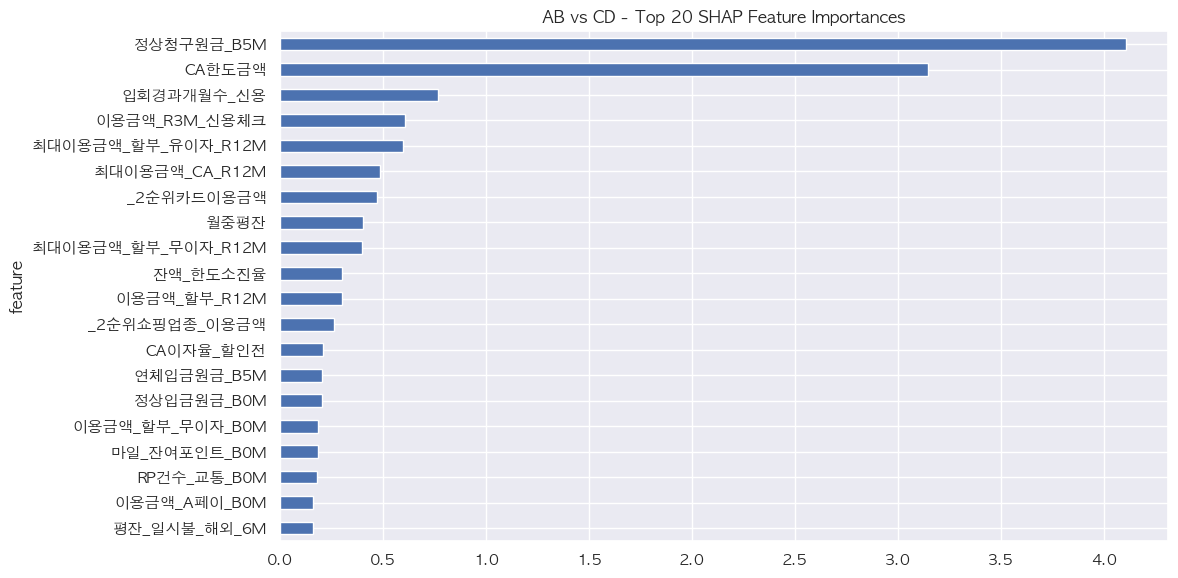

In [102]:
from catboost import Pool

# AB vs CD 모델 학습에 사용한 데이터로 Pool 생성
pool_abcd = Pool(X_train_abcd, y_train_abcd_bin)

import numpy as np

# SHAP 값 추출 (마지막 열은 bias term → 제외)
shap_values_abcd = model_ab_vs_cd.get_feature_importance(
    type='ShapValues',
    data=pool_abcd,
    prettified=False
)
shap_values_abcd = np.array(shap_values_abcd)[:, :-1]  # bias 제거

import pandas as pd

# 평균 절댓값으로 중요도 계산
mean_shap_abcd = np.abs(shap_values_abcd).mean(axis=0)

feature_importances_abcd = pd.DataFrame({
    'feature': X_train_abcd.columns,
    'importance': mean_shap_abcd
}).sort_values(by='importance', ascending=False)

import matplotlib.pyplot as plt

top_n = 20
feature_importances_abcd.head(top_n).plot(
    kind='barh',
    x='feature',
    y='importance',
    title=f"AB vs CD - Top {top_n} SHAP Feature Importances",
    legend=False
)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### AB vs CD 2개 컬럼으로 분류 (정상청구원금_B5M, CA한도금액)

In [115]:
top20_features = feature_importances_abcd.head(20)['feature'].tolist()
print(top20_features)

X_train_top20 = X_train_abcd[top20_features]
X_val_top20   = X_val_abcd[top20_features]

model_ab_vs_cd_top20 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=4,  # 단순화 목적이라 약간 낮춰도 좋음
    loss_function='Logloss',
    eval_metric='F1',
    class_weights=class_weights,  # 아까 썼던 거 재사용
    random_seed=42,
    verbose=False
)

model_ab_vs_cd_top20.fit(X_train_top20, y_train_abcd_bin)

from sklearn.metrics import classification_report, confusion_matrix

y_pred_top20 = model_ab_vs_cd_top20.predict(X_val_top20)
print(classification_report(y_val_abcd_bin, y_pred_top20))
print(confusion_matrix(y_val_abcd_bin, y_pred_top20))

['정상청구원금_B5M', 'CA한도금액', '입회경과개월수_신용', '이용금액_R3M_신용체크', '최대이용금액_할부_유이자_R12M', '최대이용금액_CA_R12M', '_2순위카드이용금액', '월중평잔', '최대이용금액_할부_무이자_R12M', '잔액_한도소진율', '이용금액_할부_R12M', '_2순위쇼핑업종_이용금액', 'CA이자율_할인전', '연체입금원금_B5M', '정상입금원금_B0M', '이용금액_할부_무이자_B0M', '마일_잔여포인트_B0M', 'RP건수_교통_B0M', '이용금액_A페이_B0M', '평잔_일시불_해외_6M']
              precision    recall  f1-score   support

           0       0.13      0.98      0.22       223
           1       1.00      0.98      0.99     95366

    accuracy                           0.98     95589
   macro avg       0.56      0.98      0.61     95589
weighted avg       1.00      0.98      0.99     95589

[[  218     5]
 [ 1520 93846]]
